# SMclarify Bias Metrics for Marketing Data

In [1]:
from smclarify.bias import report
from typing import Dict
from collections import defaultdict
import pandas as pd
import seaborn as sns

Get the [marketing dataset]( https://archive.ics.uci.edu/ml/datasets/bank+marketing). 

In [2]:
!curl -o bank-additional.zip https://sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com/autopilot/direct_marketing/bank-additional.zip
!unzip -o bank-additional.zip -d /tmp/
!rm -rf bank-additional.zip

local_data_path = '/tmp/bank-additional/bank-additional-full.csv'
df = pd.read_csv(local_data_path)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  422k  100  422k    0     0   372k      0  0:00:01  0:00:01 --:--:--  372k
Archive:  bank-additional.zip
   creating: /tmp/bank-additional/
  inflating: /tmp/bank-additional/bank-additional-names.txt  
  inflating: /tmp/bank-additional/bank-additional.csv  
  inflating: /tmp/bank-additional/bank-additional-full.csv  


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


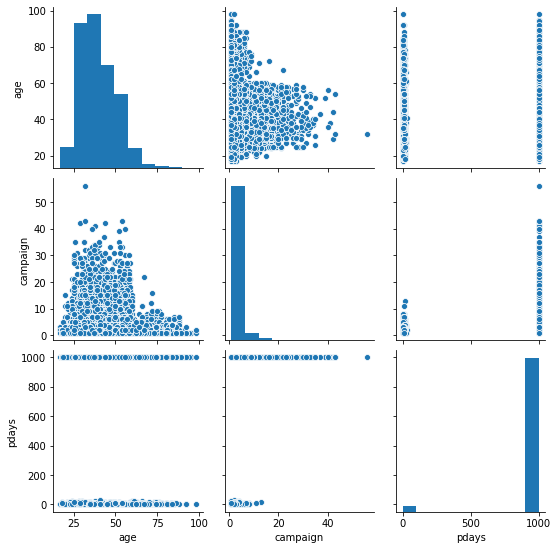

In [4]:
sns.pairplot(df[['age','campaign', 'pdays']])

<AxesSubplot:xlabel='y', ylabel='count'>

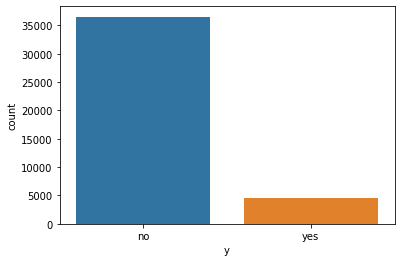

In [5]:
sns.countplot(df['y'])

## Calculate pre-training bias metrics

In [6]:
# Measure bias for the marital attribute
facet_column = report.FacetColumn('marital')
label_column = report.LabelColumn(name='y', data=df['y'], positive_label_values=['yes'])


In [7]:
report.bias_report(df, facet_column, label_column, stage_type=report.StageType.PRE_TRAINING)

[{'value_or_threshold': 'married',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': -0.21044964552782364},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.02807076754978076},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.005386388255013634},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.0010087750478567055},
   {'name': 'LP',
    'description': 'L-p Norm (LP)',
    'value': 0.039698060175122535},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.028070767549780766},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.05614153509956153},
   {'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': None,
    'error': 'Group variable is empty or not provided'}]},
 {'value_or_threshold': 'single',
  

In [8]:
# Measure bias for the Age attribute, that we bucket into 3 bins. 
df['age_disc'] = pd.cut(df.age, bins=3, labels=['young', 'middle', 'old'])
facet_column = report.FacetColumn('age_disc')
label_column = report.LabelColumn(name='y', data=df['y'], positive_label_values=['yes'])


In [9]:
report.bias_report(df, facet_column, label_column, stage_type=report.StageType.PRE_TRAINING)

[{'value_or_threshold': 'middle',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.38987083616587354},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.005325284796874788},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.00020490166271740565},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 4.115699946832059e-05},
   {'name': 'LP',
    'description': 'L-p Norm (LP)',
    'value': 0.007531089983239567},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.005325284796874781},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.010650569593749562},
   {'name': 'CDDL',
    'description': 'Conditional Demographic Disparity in Labels (CDDL)',
    'value': None,
    'error': 'Group variable is empty or not provided'}]},
 {'value_or_threshold': 'young',
 